In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
df = pd.read_csv("sky_features.csv")

features = ['cloud_coverage', 'white_pixel_ratio', 'sun_luminance_mean',
            'sun_luminance_max', 'hour', 'minute']

# Якщо потрібно підготовити ознаки
X = df[features]
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [3]:
def detect_sun_and_light_percent(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, int(0.98 * np.max(gray)), 255, cv2.THRESH_BINARY)

    # Знаходимо контури яскравих зон
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return (0, 0), 0.0  # fallback

    # Вибираємо найбільшу яскраву зону (можливо сонце)
    largest_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(largest_contour)

    if M["m00"] == 0:
        return (0, 0), 0.0

    # Центр маси контуру — координати сонця
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    # Освітленість — середнє значення всіх пікселів в контурі
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [largest_contour], -1, 255, -1)
    light_pixels = gray[mask == 255]
    light_level = np.mean(light_pixels) / 255 * 100

    return (cx, cy), light_level



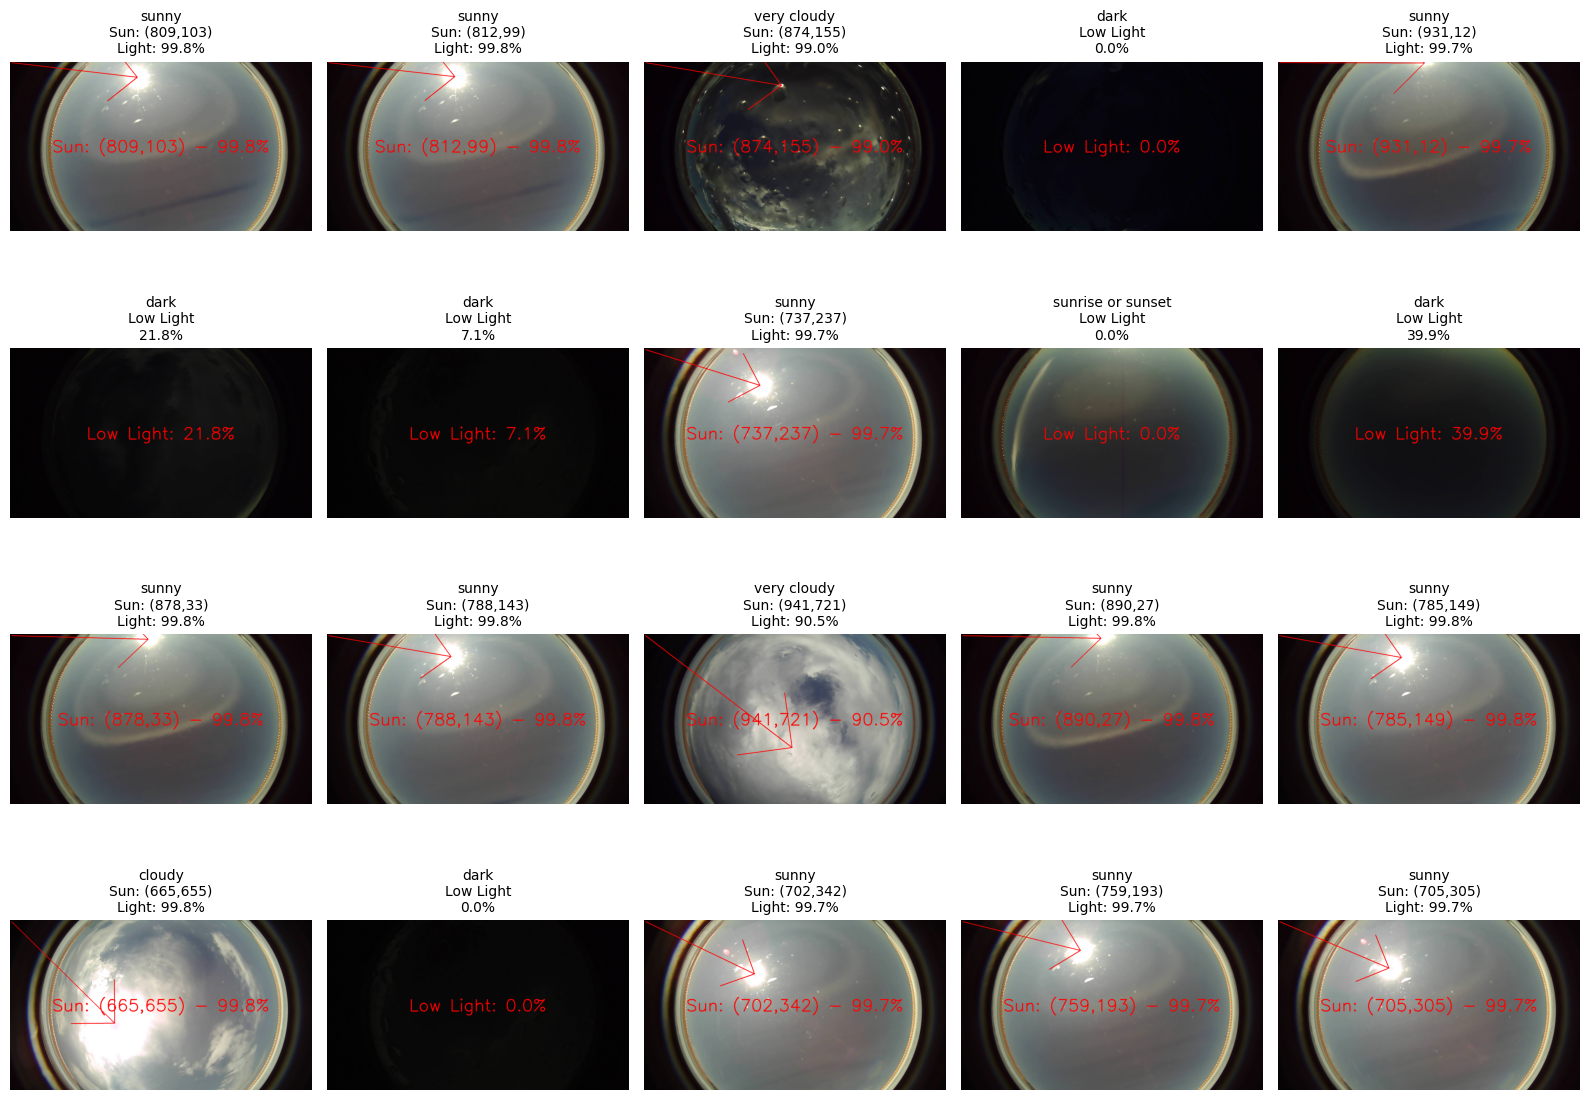

In [ ]:
sample = df.sample(20, random_state=42)

plt.figure(figsize=(16, 12))

for i, row in enumerate(sample.itertuples()):
    path = os.path.join("images", row.label, os.path.basename(row.filename))
    img = cv2.imread(path)

    if img is None:
        print(f"⚠️ Пропущено: {path}")
        continue

    sun_pos, light_pct = detect_sun_and_light_percent(img)
    h, w = img.shape[:2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 3.5  # 👈 змінюй розмір шрифту тут
    thickness = 5     # 👈 і товщину тексту

    if light_pct >= 70:
        x, y = sun_pos
        cv2.arrowedLine(img, (10, 10), (x, y), (0, 0, 255), 3, tipLength=0.3)

        text = f"Sun: ({x},{y}) - {light_pct:.1f}%"
        (tw, th), _ = cv2.getTextSize(text, font, font_scale, thickness)
        x_text = (w - tw) // 2
        y_text = (h + th) // 2

        cv2.putText(
            img,
            text,
            (x_text, y_text),
            font,
            font_scale,
            (0, 0, 255),
            thickness
        )

        title_text = f"{row.label}\nSun: ({x},{y})\nLight: {light_pct:.1f}%"
    else:
        text = f"Low Light: {light_pct:.1f}%"
        (tw, th), _ = cv2.getTextSize(text, font, font_scale, thickness)
        x_text = (w - tw) // 2
        y_text = (h + th) // 2

        cv2.putText(
            img,
            text,
            (x_text, y_text),
            font,
            font_scale,
            (0, 0, 255),
            thickness
        )

        title_text = f"{row.label}\nLow Light\n{light_pct:.1f}%"

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(title_text, fontsize=10)

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Створення таблиці архітектури моделі
model_summary = []

for i, layer in enumerate(model.layers):
    layer_type = layer.__class__.__name__
    output_shape = str(layer.output_shape)
    params = layer.count_params()
    activation = getattr(layer, 'activation', None)
    activation_name = activation.__name__ if activation else '-'

    model_summary.append({
        "№": i + 1,
        "Тип шару": layer_type,
        "Розмір виходу": output_shape,
        "Кількість параметрів": params,
        "Функція активації": activation_name
    })

model_df = pd.DataFrame(model_summary)


NameError: name 'model' is not defined

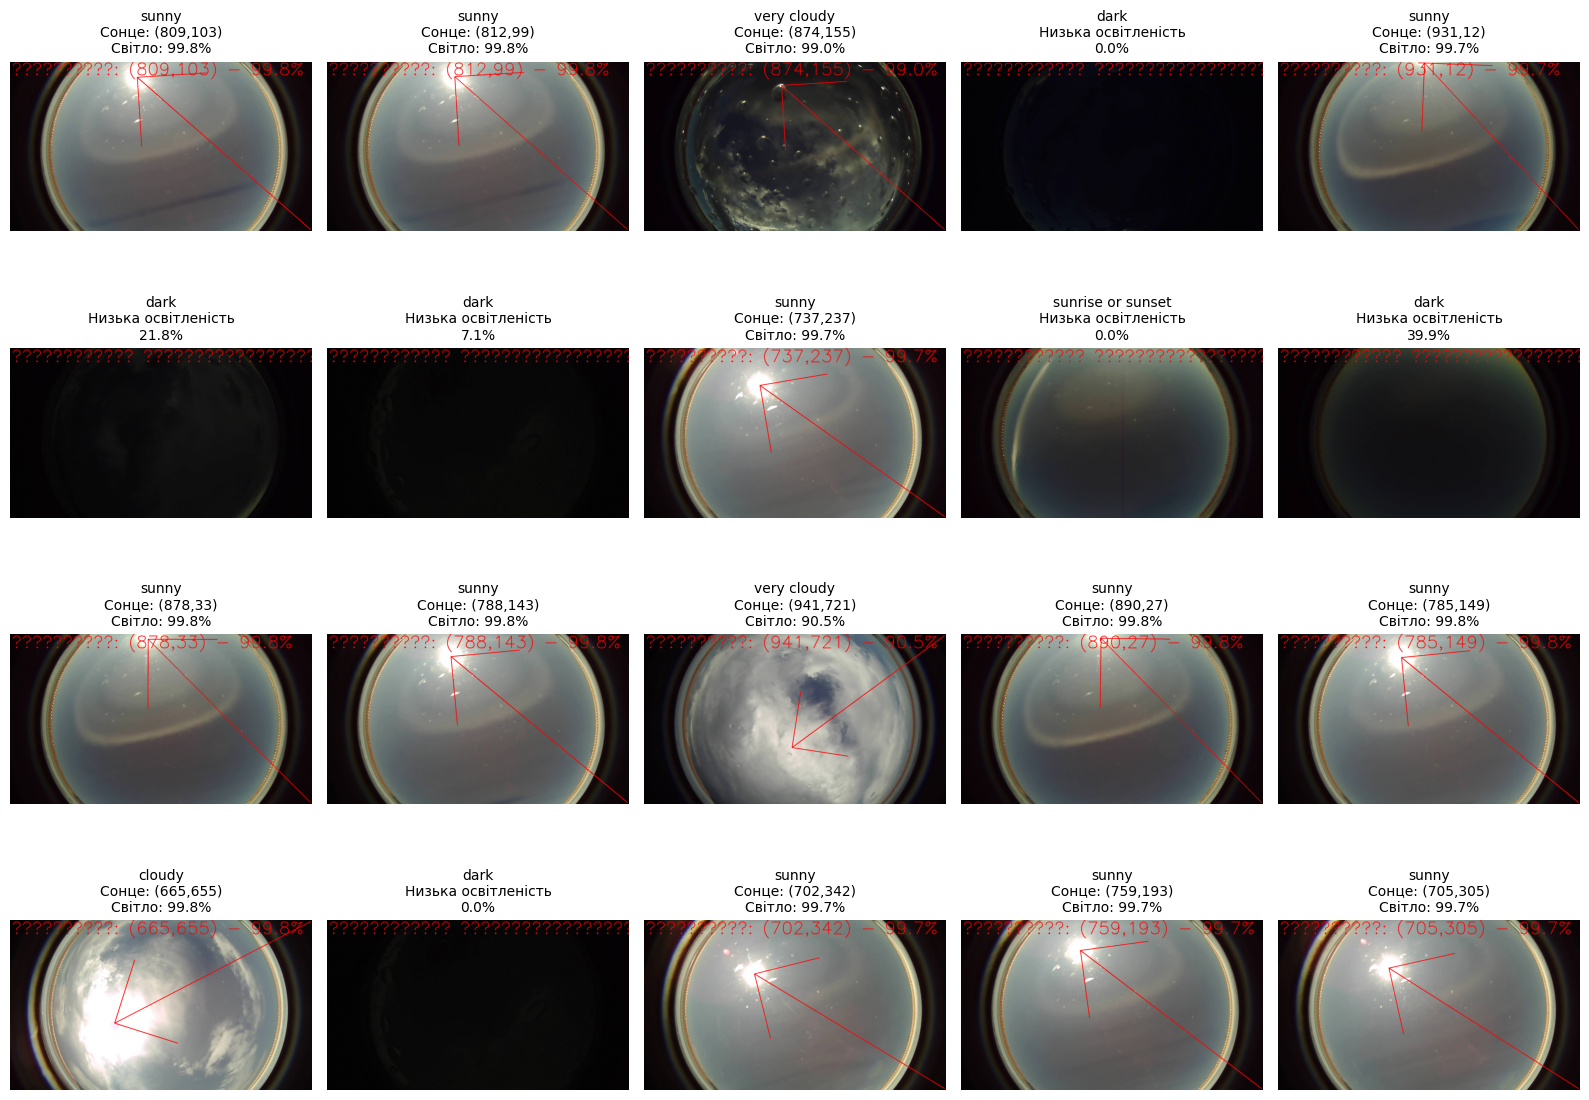

In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import logging

# Налаштування логування для запису помилок
logging.basicConfig(filename='error_log.txt', level=logging.WARNING)

# Завантаження даних із файлу
df = pd.read_csv("sky_features.csv")

# Ознаки для можливого аналізу
features = ['cloud_coverage', 'white_pixel_ratio', 'sun_luminance_mean',
            'sun_luminance_max', 'hour', 'minute']

# Підготовка даних (залишено для можливого використання)
X = df[features]
y = df['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Функція для визначення положення сонця та відсотка освітленості
def detect_sun_and_light_percent(img):
    """
    Визначає положення сонця та відсоток освітленості на зображенні.

    Параметри:
    img (numpy.ndarray): Зображення у форматі BGR.

    Повертає:
    tuple: Координати сонця (x, y) та відсоток освітленості.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, int(0.98 * np.max(gray)), 255, cv2.THRESH_BINARY)

    # Знаходимо контури яскравих зон
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return (0, 0), 0.0  # Якщо контури не знайдені

    # Вибираємо найбільшу яскраву зону (можливо сонце)
    largest_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(largest_contour)

    if M["m00"] == 0:
        return (0, 0), 0.0  # Якщо момент дорівнює нулю

    # Центр маси контуру — координати сонця
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    # Освітленість — середнє значення всіх пікселів в контурі
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [largest_contour], -1, 255, -1)
    light_pixels = gray[mask == 255]
    light_level = np.mean(light_pixels) / 255 * 100

    return (cx, cy), light_level

# Функція для аннотації зображення
def annotate_image(img, sun_pos, light_pct, label):
    """
    Аннотує зображення стрілкою та текстом в залежності від відсотка освітленості.

    Параметри:
    img (numpy.ndarray): Зображення у форматі BGR.
    sun_pos (tuple): Координати сонця (x, y).
    light_pct (float): Відсоток освітленості.
    label (str): Мітка зображення.

    Повертає:
    numpy.ndarray: Аннотоване зображення.
    str: Текст для заголовка.
    """
    h, w = img.shape[:2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = min(h, w) / 300  # Адаптивний розмір шрифту
    thickness = max(1, int(font_scale))  # Товщина тексту

    if light_pct >= 70:
        x, y = sun_pos
        # Динамічна початкова точка стрілки
        start_x = 10 if x > w // 2 else w - 10
        start_y = 10 if y > h // 2 else h - 10
        cv2.arrowedLine(img, (start_x, start_y), (x, y), (0, 0, 255), 3, tipLength=0.3)

        text = f"Сонце: ({x},{y}) - {light_pct:.1f}%"
        (tw, th), _ = cv2.getTextSize(text, font, font_scale, thickness)
        x_text = 10
        y_text = th + 10  # Текст у верхній частині

        cv2.putText(
            img,
            text,
            (x_text, y_text),
            font,
            font_scale,
            (0, 0, 255),
            thickness
        )

        title_text = f"{label}\nСонце: ({x},{y})\nСвітло: {light_pct:.1f}%"
    else:
        text = f"Низька освітленість: {light_pct:.1f}%"
        (tw, th), _ = cv2.getTextSize(text, font, font_scale, thickness)
        x_text = 10
        y_text = th + 10  # Текст у верхній частині

        cv2.putText(
            img,
            text,
            (x_text, y_text),
            font,
            font_scale,
            (0, 0, 255),
            thickness
        )

        title_text = f"{label}\nНизька освітленість\n{light_pct:.1f}%"

    return img, title_text

# Вибір 20 випадкових зображень
sample = df.sample(20, random_state=42)

plt.figure(figsize=(16, 12))

for i, row in enumerate(sample.itertuples()):
    path = os.path.join("images", row.label, os.path.basename(row.filename))
    img = cv2.imread(path)

    if img is None:
        logging.warning(f"Не вдалося завантажити зображення: {path}")
        continue

    sun_pos, light_pct = detect_sun_and_light_percent(img)
    img_annotated, title_text = annotate_image(img, sun_pos, light_pct, row.label)

    img_rgb = cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(title_text, fontsize=10)

plt.tight_layout()
plt.show()